In [16]:
import numpy as np
import pandas as pd
import re
import json
from sklearn.model_selection import StratifiedKFold


In [3]:
def read_json(input_json):
    with open(input_json) as j:
        v=json.load(j)
    # print(v['features'][0]['geometry']['coordinates'][0][0])
    # print((v['features'][0]))

    df=dict()
    df['plot_number']=[]
    df['row_ID']=[]
    df['x0']=[]
    df['x1']=[]
    df['x2']=[]
    df['x3']=[]
    df['y0']=[]
    df['y1']=[]
    df['y2']=[]
    df['y3']=[]
        
    for i in range(len(v['features'])):
        df['plot_number'].append(v['features'][i]['properties']['plot'])
        df['row_ID'].append(v['features'][i]['properties']['row'])
        df['x0'].append([v['features'][i]['geometry']['coordinates'][0][0][0]])
        df['x1'].append([v['features'][i]['geometry']['coordinates'][0][1][0]])
        df['x2'].append([v['features'][i]['geometry']['coordinates'][0][2][0]])
        df['x3'].append([v['features'][i]['geometry']['coordinates'][0][3][0]])
        df['y0'].append([v['features'][i]['geometry']['coordinates'][0][0][1]])
        df['y1'].append([v['features'][i]['geometry']['coordinates'][0][1][1]])
        df['y2'].append([v['features'][i]['geometry']['coordinates'][0][2][1]])
        df['y3'].append([v['features'][i]['geometry']['coordinates'][0][3][1]])
    df=pd.DataFrame(df)
    # print(max(set(df['plot_number'])))
    return df

## HIPS

In [19]:
input_json=r'E:\Ender\data\UAV\HIPS_2021\life\20210617_india_f42mYS_HIPS_1cm_manshrink.geojson'

df=read_json(input_json)
df=df[df['plot_number']<5489]
variety=pd.read_excel('E:/Ender/data/LAI-2200/HIPS_2020/field.xlsx',sheet_name='Sheet2')
variety=variety[variety['Plot']<5489]
variety_set=list(set(variety['Pedigree']))
index=np.random.choice(len(variety_set),9)
selected_variety=[]
for i in index:
    selected_variety.append(variety_set[i])
# print(selected_variety)

from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=42)
kf.get_n_splits(variety_set)
for i,j in kf.split(variety_set):
    v=[]
    for k in j:
        v.append(variety_set[k])
    plots=[]
    for k in v:
        for r in range(len(variety['Pedigree'])):
            if variety['Pedigree'][r]==k:
                plots.append(variety['Plot'][r])

    print(plots)

[5460, 5485, 5455, 5472, 5413, 5432, 5401, 5427, 5410, 5435, 5417, 5430, 5457, 5481, 5420, 5436, 5465, 5476]
[5456, 5468, 5454, 5487, 5408, 5441, 5407, 5429, 5412, 5440, 5447, 5478, 5418, 5434, 5406, 5444, 5404, 5424]
[5450, 5474, 5419, 5431, 5449, 5475, 5402, 5423, 5463, 5484, 5411, 5433, 5452, 5486, 5464, 5479, 5416, 5438]
[5453, 5467, 5448, 5483, 5415, 5442, 5405, 5428, 5459, 5480, 5458, 5471, 5409, 5425, 5461, 5473, 5403, 5437]
[5466, 5482, 5414, 5426, 5446, 5488, 5462, 5469, 5422, 5443, 5451, 5470, 5421, 5439, 5445, 5477]


In [16]:
for i,j in kf.split(variety_set):
    v=[]
    for k in j:
        v.append(variety_set[k])
    plots=[]
    for k in v:
        for r in range(len(variety['Pedigree'])):
            if variety['Pedigree'][r]==k:
                plots.append(variety['Plot'][r])

    print(v)

['B73 X PHK76', 'LH195 X PHZ51', 'PHJ89 X PH207', 'B73 X PHN82', 'LH244', 'LH195 X PHN82', 'PHP02', 'PH207', 'LH82']
['LH244 X MO17', 'PHG29 X PHG47', 'PHB47 X PHN82', 'B84', 'PHZ51', 'PHJ89', 'B73', 'PHJ40', 'LH195']
['ARPA W22 (X17EA)', 'LH185', 'PHW65', 'TX714 X PHZ51', 'PHT69', 'PHB47 X MO17', 'TX714', 'LH244 X PHZ51', 'PHAJ0']
['LH145', 'MO17', 'PHRE1', 'PHTD5', 'LH145 X LH82', 'PHRE1 X PHTD5', 'LH195 X MO17', 'B73 X MO17', 'PHJ40 X PHAJ0']
['LH195 X PHK76', 'B73 X PHZ51', 'PHB47', 'LH244 X PHN82', 'PHR03', 'PHB47 X PHK76', 'PHB47 X PHZ51', 'LH244 X PHK76']


### 2021

In [17]:
input_json=r'E:\Ender\data\UAV\HIPS_2021\20210617_india_f42mYS_HIPS_1cm_manshrink.geojson'

df=read_json(input_json)
df=df[df['plot_number']<4439]
df=df[df['plot_number']>4350]
variety=pd.read_excel('E:/Ender/HIPS_2021_variety_map.xlsx',sheet_name='Sheet1')
variety=variety[variety['Plot']<4439]
variety=variety[variety['Plot']>4350]
for i in range(len(variety['Pedigree'])):
    if variety['Pedigree'][i]=='W22-UNIFORM MU STRAIN':
        variety['Pedigree'][i]='ARPA W22 (X17EA)'
variety_set_2021=list(set(variety['Pedigree']))
for i,j in kf.split(variety_set):
    v=[]
    for k in j:
        v.append(variety_set[k])
    plots=[]
    for k in v:
        for r in range(len(variety['Pedigree'])):
            if variety['Pedigree'][r]==k:
                plots.append(variety['Plot'][r])

    print(plots)

[4362, 4380, 4370, 4379, 4355, 4375, 4352, 4386, 4416, 4427, 4367, 4376, 4406, 4428, 4411, 4422, 4400, 4417]
[4368, 4377, 4351, 4390, 4366, 4374, 4397, 4438, 4414, 4420, 4401, 4421, 4402, 4431, 4399, 4424, 4396, 4418]
[4415, 4437, 4408, 4433, 4405, 4434, 4360, 4381, 4409, 4419, 4356, 4387, 4403, 4429, 4353, 4378, 4395, 4426]
[4413, 4432, 4407, 4430, 4398, 4436, 4410, 4425, 4369, 4391, 4354, 4384, 4357, 4383, 4372, 4385, 4361, 4389]
[4365, 4382, 4363, 4393, 4404, 4423, 4359, 4394, 4412, 4435, 4371, 4388, 4358, 4373, 4364, 4392]


<ipython-input-17-020da3f401c6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety['Pedigree'][i]='ARPA W22 (X17EA)'


In [29]:
print(variety_set_2021)
print('-----------')
print(variety_set)
for i in variety_set_2021:
    if i not in variety_set:
        print(i)
for i in variety_set:
    if i not in variety_set_2021:
        print(i)
# variety_set_2021=variety_set_2021.sort()
# variety_set=variety_set.sort()
# variety_set==variety_set_2021

['MO17', 'PHR03', 'LH195 X PHK76', 'PHRE1 X PHTD5', 'B73 X MO17', 'PHAJ0', 'B84', 'TX714', 'LH82', 'B73 X PHN82', 'PHJ40 X PHAJ0', 'PHRE1', 'PHJ40', 'B73 X PHK76', 'PHW65', 'LH244', 'PHB47 X PHZ51', 'B73 X PHZ51', 'ARPA W22 (X17EA)', 'LH185', 'PH207', 'PHB47 X PHK76', 'B73', 'PHP02', 'LH244 X PHZ51', 'LH195', 'LH195 X MO17', 'TX714 X PHZ51', 'LH244 X MO17', 'PHT69', 'LH244 X PHN82', 'LH145', 'LH145 X LH82', 'LH244 X PHK76', 'PHTD5', 'PHJ89', 'PHB47', 'PHB47 X MO17', 'LH195 X PHZ51', 'PHZ51', 'PHB47 X PHN82', 'PHG29 X PHG47', 'PHJ89 X PH207', 'LH195 X PHN82']
-----------
['MO17', 'PHR03', 'LH195 X PHK76', 'PHRE1 X PHTD5', 'B73 X MO17', 'PHAJ0', 'B84', 'TX714', 'LH82', 'B73 X PHN82', 'PHJ40 X PHAJ0', 'PHRE1', 'PHJ40', 'B73 X PHK76', 'PHW65', 'LH244', 'PHB47 X PHZ51', 'B73 X PHZ51', 'ARPA W22 (X17EA)', 'LH185', 'PH207', 'PHB47 X PHK76', 'PHP02', 'B73', 'LH244 X PHZ51', 'PHT69', 'LH195 X MO17', 'TX714 X PHZ51', 'LH244 X MO17', 'LH195', 'LH244 X PHN82', 'LH145', 'LH145 X LH82', 'LH244 X PHK

In [30]:
variety_set_2021_sort=variety_set_2021.sort()
variety_set_sort=variety_set.sort()
variety_set_sort==variety_set_2021_sort

True

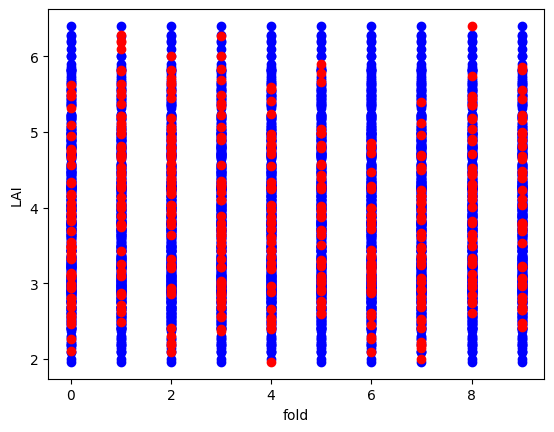

In [12]:
import json
import matplotlib.pyplot as plt

for i in range(10):
    fname=f'E:/Ender/data/UAV/HIPS_2021/10fold_json/train_test_split_fold{i}.json'
    with open(fname,'r') as json_file:
        data_dict=json.load(json_file)
    xx_train=[i for j in range(len(data_dict['train']['LAI']))]
    xx_testt=[i for j in range(len(data_dict['test']['LAI']))]
    plt.scatter(xx_train,data_dict['train']['LAI'], color='blue')
    plt.scatter(xx_testt,data_dict['test']['LAI'], color='red')
    # print(data_dict['test']['LAI'])   
plt.xlabel('fold')
plt.ylabel('LAI')
# plt.legend()
plt.show() 


## 10 fold (stratified by inbred/hybrid)

In [21]:
input_json=r'E:\Ender\data\UAV\HIPS_2021\20210617_india_f42mYS_HIPS_1cm_manshrink.geojson'
df=read_json(input_json)
df=df[df['plot_number']<4439]
df=df[df['plot_number']>4350]
variety=pd.read_excel('E:/Ender/HIPS_2021_variety_map.xlsx',sheet_name='Sheet1')
variety=variety[variety['Plot']<4439]
variety=variety[variety['Plot']>4350]
for i in range(len(variety['Pedigree'])):
    if variety['Pedigree'][i]=='W22-UNIFORM MU STRAIN':
        variety['Pedigree'][i]='ARPA W22 (X17EA)'
variety_set_2021=list(set(variety['Pedigree']))
variety_set_2021.sort()
print(variety_set_2021[5])
hi=np.zeros((len(variety_set_2021)))
for i in range(len(variety_set_2021)):
    if ' X ' in variety_set_2021[i]:
        hi[i]=1
skf=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)
skf.get_n_splits(variety_set_2021,hi)
for train_index, test_index in skf.split(variety_set_2021,hi):
    v=[]
    for k in test_index:
        v.append(variety_set_2021[k])
    plots=[]
    for k in v:
        for r in range(len(variety['Pedigree'])):
            if variety['Pedigree'][r]==k:
                plots.append(variety['Plot'][r])
    print(plots)

B73 X PHZ51
[4415, 4437, 4413, 4432, 4355, 4375, 4406, 4428, 4360, 4381]
[4396, 4418, 4370, 4379, 4364, 4392, 4407, 4430, 4411, 4422]
[4363, 4393, 4369, 4391, 4368, 4377, 4409, 4419, 4403, 4429]
[4352, 4386, 4397, 4438, 4367, 4376, 4356, 4387, 4412, 4435]
[4400, 4417, 4366, 4374, 4361, 4389, 4410, 4425]
[4402, 4431, 4362, 4380, 4359, 4394, 4404, 4423]
[4408, 4433, 4357, 4383, 4371, 4388, 4405, 4434]
[4353, 4378, 4395, 4426, 4358, 4373, 4401, 4421]
[4365, 4382, 4351, 4390, 4399, 4424, 4414, 4420]
[4372, 4385, 4416, 4427, 4398, 4436, 4354, 4384]


<ipython-input-21-d07254d429c5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variety['Pedigree'][i]='ARPA W22 (X17EA)'


In [23]:
skf=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)
skf.get_n_splits(variety_set_2021,hi)
for train_index, test_index in skf.split(variety_set_2021,hi):
    v=[]
    for k in test_index:
        v.append(variety_set_2021[k])
    plots=[]
    for k in v:
        for r in range(len(variety['Pedigree'])):
            if variety['Pedigree'][r]==k:
                plots.append(variety['Plot'][r])
    print(v)



['ARPA W22 (X17EA)', 'LH145', 'PHJ89 X PH207', 'PHP02', 'TX714 X PHZ51']
['LH195', 'LH195 X PHZ51', 'LH244 X PHK76', 'MO17', 'PH207']
['B73 X PHZ51', 'LH145 X LH82', 'LH244 X MO17', 'PHT69', 'TX714']
['B73 X PHN82', 'B84', 'LH195 X PHN82', 'PHB47 X MO17', 'PHR03']
['LH82', 'PHB47 X PHN82', 'PHJ40 X PHAJ0', 'PHTD5']
['B73', 'B73 X PHK76', 'LH244 X PHN82', 'PHB47']
['LH185', 'LH195 X MO17', 'PHB47 X PHK76', 'PHW65']
['LH244 X PHZ51', 'PHAJ0', 'PHB47 X PHZ51', 'PHJ89']
['LH195 X PHK76', 'PHG29 X PHG47', 'PHJ40', 'PHZ51']
['B73 X MO17', 'LH244', 'PHRE1', 'PHRE1 X PHTD5']


## 9D

In [57]:
input_json=r'E:\Ender\data\UAV\9CD\20210727_9dtopmid_ZM_manshrink.geojson'
df=read_json(input_json)
df['plot_number']=[int(df['plot_number'][i]) for i in range(len(df['plot_number']))]
df=df[df['plot_number']<6219]
variety=pd.read_excel('E:/Ender/data/UAV/9CD/fieldbook_9D.xlsx',sheet_name='Variety')
variety=variety[np.logical_and(variety['Plot']!='Fill',variety['Plot']!='fill')]

variety['Plot']=[int(variety['Plot'].iloc[i]) for i in range(len(variety['Plot']))]
maize_plot=pd.read_excel('E:/Ender/data/UAV/9CD/fieldbook_9D.xlsx',sheet_name='Sheet5',header=None).to_numpy()
maize_plot=list(set((maize_plot.reshape(-1))))
idx=[variety['Plot'].iloc[i] in maize_plot for i in range(len(variety['Plot']))]
variety=variety[idx]
variety_set=list(set(variety['Pedigree']))
index=np.random.choice(len(variety_set),9)
selected_variety=[]
for i in index:
    selected_variety.append(variety_set[i])
# print(selected_variety)

from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=42)
kf.get_n_splits(variety_set)
for i,j in kf.split(variety_set):
    v=[]
    for k in j:
        v.append(variety_set[k])
    plots=[]
    for k in v:
        for r in range(len(variety['Pedigree'])):
            if variety['Pedigree'].iloc[r]==k:
                plots.append(variety['Plot'].iloc[r])

    # print(plots)
variety_set

['Beck’s 5994V2P', 'DKC59-82RIB', '(B73xMo17)-F1', 'P1197AM', 'Beck’s 6374V2P']

In [ ]:
for i,j in kf.split(variety_set):
    v=[]
    for k in j:
        v.append(variety_set[k])
    plots=[]
    for k in v:
        for r in range(len(variety['Pedigree'])):
            if variety['Pedigree'][r]==k:
                plots.append(variety['Plot'][r])

    print(v)

In [56]:
variety=pd.read_excel('E:/Ender/data/UAV/9CD/fieldbook_9D.xlsx',sheet_name='Sheet4')
print(set(variety['Pedigree']))

{'Beck’s 5994V2P', 'DKC59-82RIB', '(B73xMo17)-F1', 'P1197AM', 'Beck’s 6374V2P'}
